### All Model Comparison Time Series Analysis
In this, we estimate the performance of all models using only price(Microsoft Close) and compare performance.
A total of 12 models are compared, 3 statistical models (Arima, Exponential Smoothing, Theta), 3 machine learning models(Regression, Random Forest, XGB Boost), and 6 neural network models(N-BEATS, TCN, RNN, LSTM, GRU, TRANSFORMERS).

###  Table 1, Model Performance with Backtest (1day)

The total period is divided into 3 period, before covid, covid, after covid.

Training and testing were conducted by dividing each section into 80:20, and the model was evaluated by performing a backtest based on the trained model for the test period.

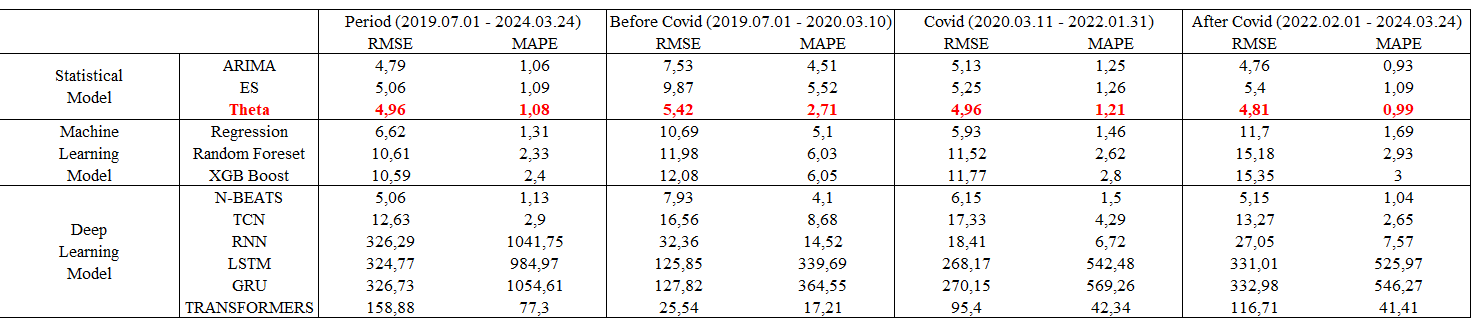

###  Table 2, Model Performance with Backtest (10 days)

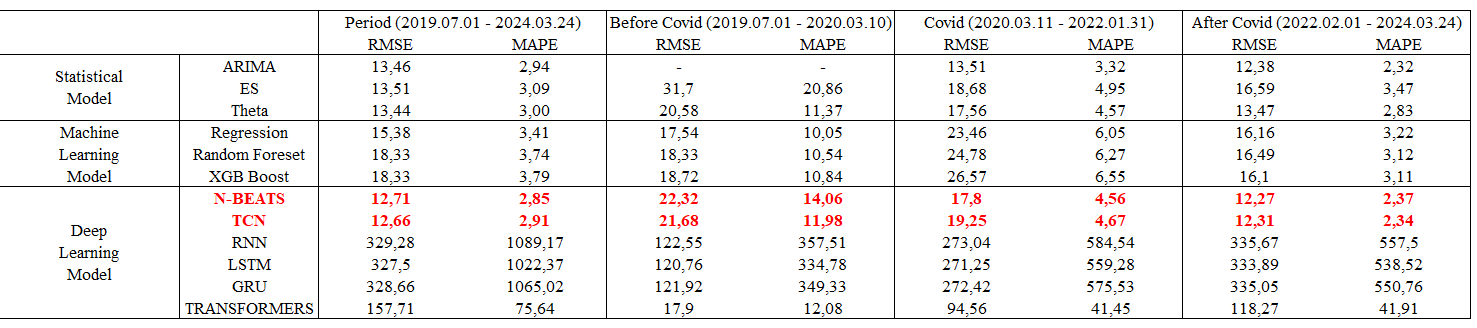

### Chart 1. Statistical VS Machine Learning VS Neural Network

This chart shows that statistical models are superior for short-term predictions, but statistical models and machine learning models show a decrease in prediction ability as the prediction period becomes longer, but the neural network model shows little change in performance.

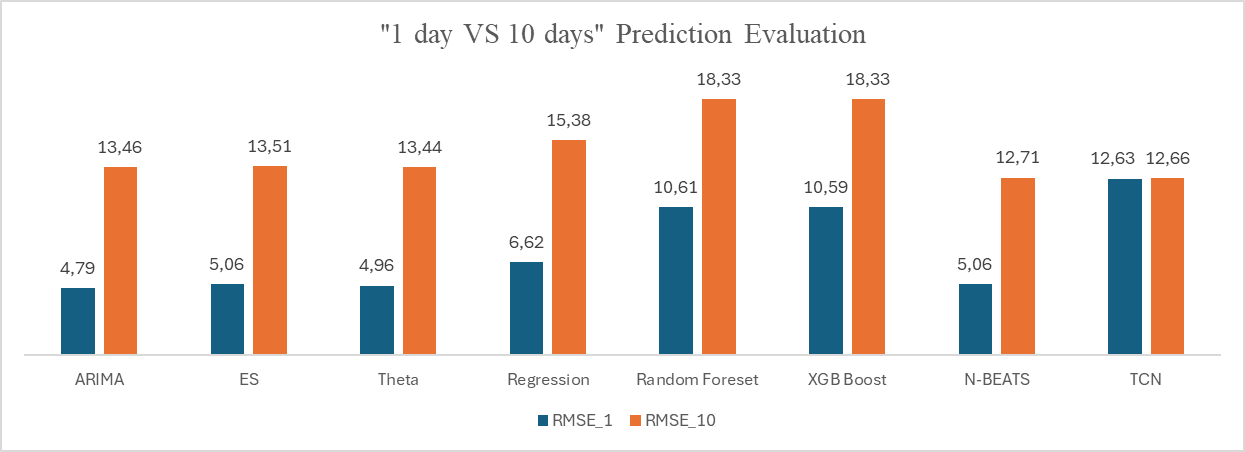

In [14]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Arima
from statsmodels.graphics.tsaplots import plot_acf

import darts
from darts.utils.statistics import plot_residuals_analysis
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
from statsmodels.graphics.tsaplots import plot_acf
from darts.dataprocessing.transformers import Scaler
from darts import concatenate


# model
from darts.models import XGBModel
from darts.models import RegressionModel 
from sklearn.linear_model import Ridge
from darts.models import XGBModel
from darts.models import ARIMA
from darts.models import RandomForest
from darts.models import ExponentialSmoothing, Theta
from darts.models import TCNModel,NBEATSModel,TransformerModel,BlockRNNModel

# darts model evaluation
from darts.metrics import mape, rmse, r2_score

In [3]:
# Data preparation for model development

df =pd.read_csv(r'C:\Users\dicod\Documents\2024\project_with Hamid(2024_3rd semester)\Scientific Project\Data\final_df.csv')
df_price = df[['Date','Close']]
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price['Date'] = df_price['Date'].dt.strftime('%Y-%m-%d')
df_price['Date'] = df_price['Date'].apply(lambda x:x[0:10])
df_price['Date'] = pd.to_datetime(df['Date'])



# dataframe to timeseries
ts_price = TimeSeries.from_dataframe(df_price, time_col=None, value_cols='Close', fill_missing_dates=False, freq='D')

# Missing value fillin
# transformer = MissingValuesFiller()
# ts_price = transformer.transform(ts_price)

# After COVID (from February 1, 2022)
before, after_covid = ts_price.split_after(653)
                                                        
# Before COVID (up to March 11, 2020)
before_covid, covid = before.split_after(174)

# data split the train and test
train, test = ts_price.split_after(0.8)
train_covid, test_covid = covid.split_after(0.8)
train_before_covid, test_before_covid = before_covid.split_after(0.8)
train_after_covid, test_after_covid = after_covid.split_after(0.8)

C:\Users\dicod\AppData\Local\Temp\ipykernel_6732\2191378977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Date'] = pd.to_datetime(df_price['Date'])
C:\Users\dicod\AppData\Local\Temp\ipykernel_6732\2191378977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Date'] = df_price['Date'].dt.strftime('%Y-%m-%d')
C:\Users\dicod\AppData\Local\Temp\ipykernel_6732\2191378977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

### Statistical Model

1. Arima model
- define the parameters, p:1, d:1, q:1
- p is the number of autoregressive term from AR.
- d is differencing to make data stationary :  Arima models precondition is data should be stationary.
- q is the number of lagged forecast errors in the prediction equation from MA.

2. Exponential smoothing model
- check the pattern and seasonality


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


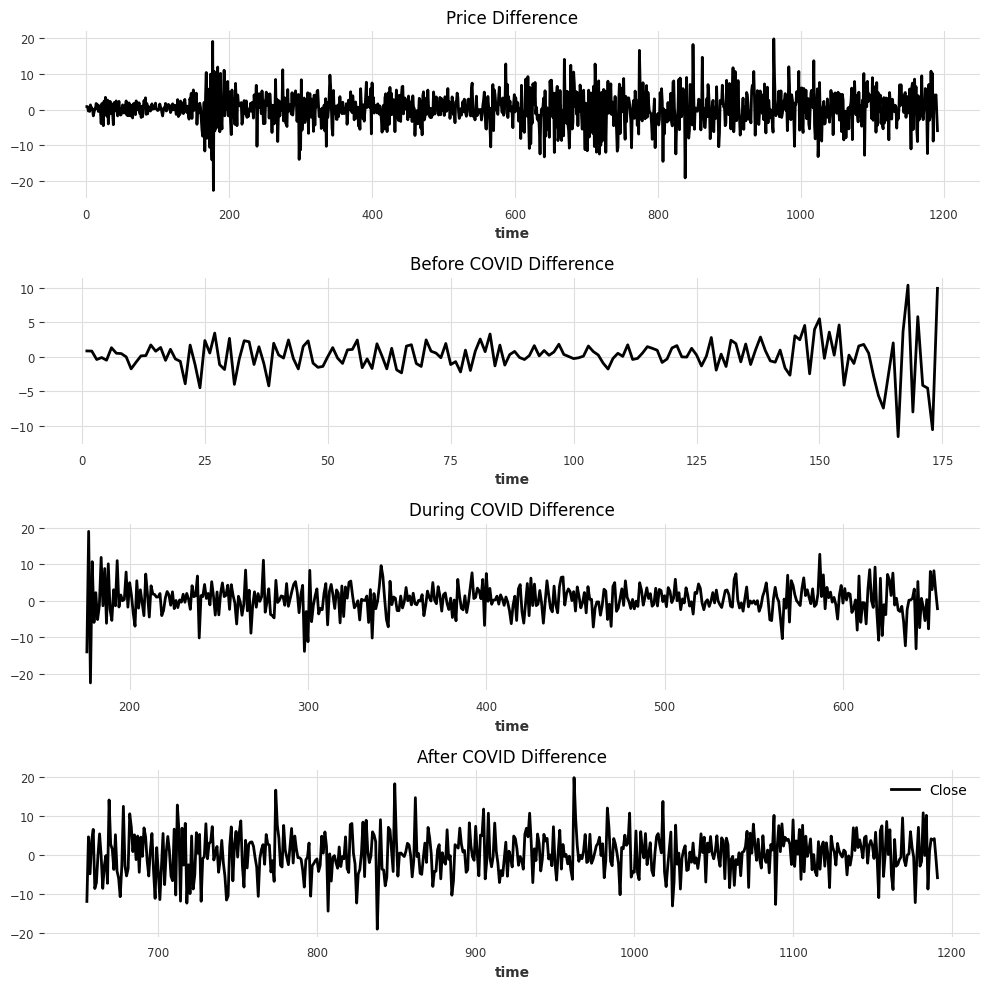

In [4]:
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Plot each TimeSeries
ts_price.diff().plot(ax=axes[0])
axes[0].set_title('Price Difference')

before_covid.diff().plot(ax=axes[1])
axes[1].set_title('Before COVID Difference')

covid.diff().plot(ax=axes[2])
axes[2].set_title('During COVID Difference')

after_covid.diff().plot(ax=axes[3])
axes[3].set_title('After COVID Difference')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


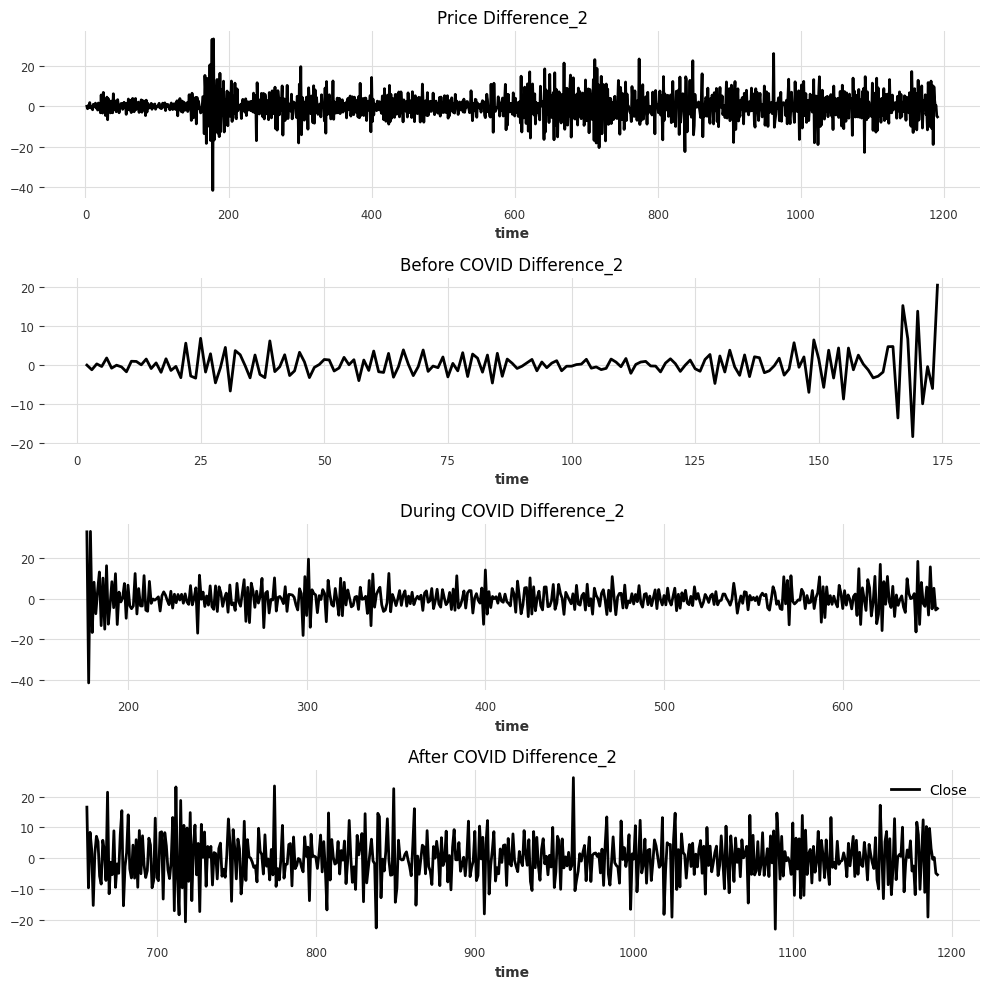

In [5]:
# diff_2

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Plot each TimeSeries
ts_price.diff().diff().plot(ax=axes[0])
axes[0].set_title('Price Difference_2')

before_covid.diff().diff().plot(ax=axes[1])
axes[1].set_title('Before COVID Difference_2')

covid.diff().diff().plot(ax=axes[2])
axes[2].set_title('During COVID Difference_2')

after_covid.diff().diff().plot(ax=axes[3])
axes[3].set_title('After COVID Difference_2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

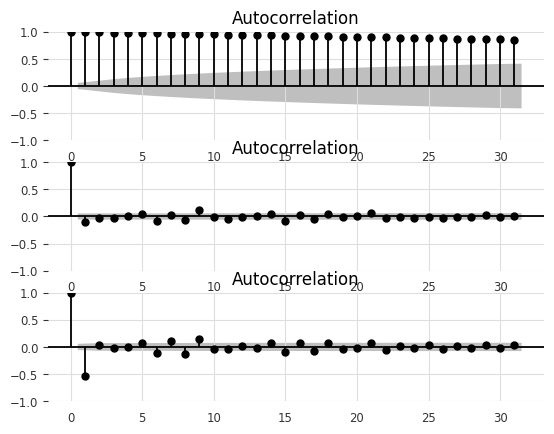

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_price['Close'], ax=ax1)
plot_acf(df_price['Close'].diff().dropna(), ax=ax2)
plot_acf(df_price['Close'].diff().diff().dropna(), ax=ax3)
#plot_acfts_after_covid
plt.show()
# from the ACF chart we find out data's ARp = 1

<function matplotlib.pyplot.show(close=None, block=None)>

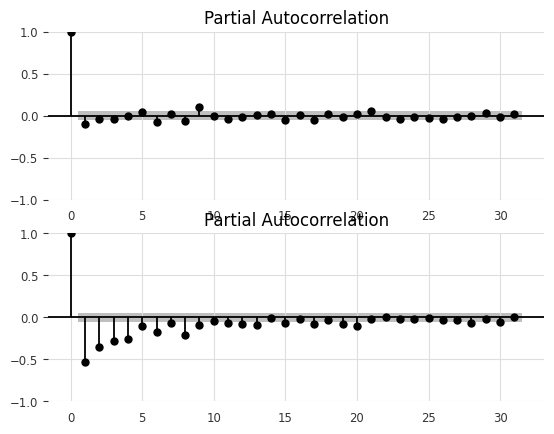

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, (ax1, ax2) = plt.subplots(2)
plot_pacf(df_price['Close'].diff().dropna(), ax=ax1)
plot_pacf(df_price['Close'].diff().diff().dropna(), ax = ax2)
plt.show

In [9]:
# 1 day prediction
# define model
arima = ARIMA(p=1, d=1, q=1)

# With total period data
data = test
arima.fit(train)
pred_price = arima.historical_forecasts(series=test, forecast_horizon=1)

print("ARIMA_RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA_R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA_MAPE = %.2f" % mape(data, pred_price))


# with before covid data
data = test_before_covid
arima.fit(train_before_covid)
pred_price = arima.historical_forecasts(series=test_before_covid, forecast_horizon=1)

print("ARIMA_before covid RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA_before covid R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA_before covid MAPE = %.2f" % mape(data, pred_price))

# With covid data
data = test_covid
arima.fit(train_covid)
pred_price = arima.historical_forecasts(series=test_covid, forecast_horizon=1)

print("ARIMA covid RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA covid R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA covid MAPE = %.2f" % mape(data, pred_price))

# With after
data = test_after_covid
arima.fit(train_after_covid)
pred_price = arima.historical_forecasts(series=test_after_covid, forecast_horizon=1)

print("ARIMA after covid RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA after covid R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA after covid MAPE = %.2f" % mape(data, pred_price))

ARIMA_RMSE = 4.79
ARIMA_R2 = 0.98
ARIMA_MAPE = 1.06


c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA_before covid RMSE = 7.53
ARIMA_before covid R2 = -0.37
ARIMA_before covid MAPE = 4.51


c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

ARIMA covid RMSE = 5.13
ARIMA covid R2 = 0.86
ARIMA covid MAPE = 1.25
ARIMA after covid RMSE = 4.76
ARIMA after covid R2 = 0.94
ARIMA after covid MAPE = 0.93


In [10]:
# 10 days prediction
arima = ARIMA(p=1, d=1, q=1)

# With total period data
data = test
arima.fit(train)
pred_price = arima.historical_forecasts(series=test, forecast_horizon=10)

print("ARIMA_RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA_R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA_MAPE = %.2f" % mape(data, pred_price))


# before covid data
data = test_before_covid
arima.fit(train_before_covid)
pred_price = arima.historical_forecasts(series=test_before_covid, forecast_horizon=10)

print("ARIMA_before covid RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA_before covid R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA_before covid MAPE = %.2f" % mape(data, pred_price))

# covid data
data = test_covid
arima.fit(train_covid)
pred_price = arima.historical_forecasts(series=test_covid, forecast_horizon=10)


print("ARIMA covid RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA covid R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA covid MAPE = %.2f" % mape(data, pred_price))

# after
data = test_after_covid
arima.fit(train_after_covid)
pred_price = arima.historical_forecasts(series=test_after_covid, forecast_horizon=10)

print("ARIMA after covid RMSE = %.2f" % rmse(data, pred_price))
print("ARIMA after covid R2 = %.2f" % r2_score(data, pred_price))
print("ARIMA after covid MAPE = %.2f" % mape(data, pred_price))

ARIMA_RMSE = 13.46
ARIMA_R2 = 0.84
ARIMA_MAPE = 2.94


c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ARIMA_before covid RMSE = nan
ARIMA_before covid R2 = nan
ARIMA_before covid MAPE = nan


c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\darts\metrics\metrics.py:1052: RuntimeWarning: Mean of empty slice.
  y_hat = y1.mean()
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\darts\metrics\metrics.py:1054: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - ss_errors / ss_tot
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Li

ARIMA covid RMSE = 13.51
ARIMA covid R2 = 0.12
ARIMA covid MAPE = 3.32
ARIMA after covid RMSE = 12.38
ARIMA after covid R2 = 0.53
ARIMA after covid MAPE = 2.32


c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. 

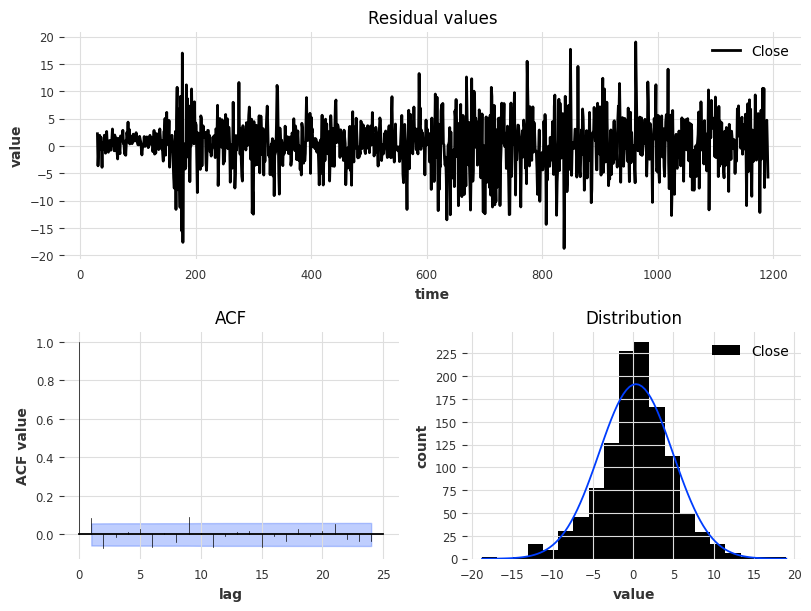

In [13]:
plot_residuals_analysis(arima.residuals(ts_price))

In [11]:
from darts.models import ExponentialSmoothing, Theta
# with total
def eval_model(model):
    data = test
    model.fit(train)
    forecast = model.historical_forecasts(series=data, forecast_horizon=1)
    # scaler inverse

    print("{} RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

# with before covid
def eval_model(model):
    data = test_before_covid
    model.fit(train_before_covid)
    forecast = model.historical_forecasts(series=data, forecast_horizon=1)

    print("{} Before Covid RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} Before Covid R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} Before Covid MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

# with covid
def eval_model(model):
    data = test_covid
    model.fit(train_covid)
    forecast = model.historical_forecasts(series=data, forecast_horizon=1)

    print("{} Covid RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} Covid R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} Covid MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

# with after covid
def eval_model(model):
    data = test_after_covid
    model.fit(train_after_covid)
    forecast = model.historical_forecasts(series=data, forecast_horizon=1)

    print("{} After Covid RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} After Covid R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} After Covid MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

ExponentialSmoothing() RMSE: 5.06
ExponentialSmoothing() R2: 0.98%
ExponentialSmoothing() MAPE: 1.09%
Theta() RMSE: 4.96
Theta() R2: 0.98%
Theta() MAPE: 1.08%
ExponentialSmoothing() Before Covid RMSE: 9.87
ExponentialSmoothing() Before Covid R2: -1.79%
ExponentialSmoothing() Before Covid MAPE: 5.52%
Theta() Before Covid RMSE: 5.42
Theta() Before Covid R2: 0.68%
Theta() Before Covid MAPE: 2.71%
ExponentialSmoothing() Covid RMSE: 5.25
ExponentialSmoothing() Covid R2: 0.86%
ExponentialSmoothing() Covid MAPE: 1.26%
Theta() Covid RMSE: 4.96
Theta() Covid R2: 0.92%
Theta() Covid MAPE: 1.21%
ExponentialSmoothing() After Covid RMSE: 5.40
ExponentialSmoothing() After Covid R2: 0.92%
ExponentialSmoothing() After Covid MAPE: 1.09%
Theta() After Covid RMSE: 4.81
Theta() After Covid R2: 0.96%
Theta() After Covid MAPE: 0.99%


In [12]:
# with total
def eval_model(model):
    data = test
    model.fit(train)
    forecast = model.historical_forecasts(series=data, forecast_horizon=10)

    print("{} RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

# with before covid
def eval_model(model):
    data = test_before_covid
    model.fit(train_before_covid)
    forecast = model.historical_forecasts(series=data, forecast_horizon=10)

    print("{} Before Covid RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} Before Covid R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} Before Covid MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

# with covid
def eval_model(model):
    data = test_covid
    model.fit(train_covid)
    forecast = model.historical_forecasts(series=data, forecast_horizon=10)

    print("{} Covid RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} Covid R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} Covid MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

# with after covid
def eval_model(model):
    data = test_after_covid
    model.fit(train_after_covid)
    forecast = model.historical_forecasts(series=data, forecast_horizon=10)

    print("{} After Covid RMSE: {:.2f}".format(model, rmse(data, forecast)))
    print("{} After Covid R2: {:.2f}".format(model, r2_score(data, forecast)))
    print("{} After Covid MAPE: {:.2f}".format(model, mape(data, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Theta())

ExponentialSmoothing() RMSE: 13.51
ExponentialSmoothing() R2: 0.84%
ExponentialSmoothing() MAPE: 3.09%
Theta() RMSE: 13.44
Theta() R2: 0.85%
Theta() MAPE: 3.00%
ExponentialSmoothing() Before Covid RMSE: 31.70
ExponentialSmoothing() Before Covid R2: -39.72%
ExponentialSmoothing() Before Covid MAPE: 20.86%
Theta() Before Covid RMSE: 20.58
Theta() Before Covid R2: -2.78%
Theta() Before Covid MAPE: 11.37%
ExponentialSmoothing() Covid RMSE: 18.68
ExponentialSmoothing() Covid R2: -0.77%
ExponentialSmoothing() Covid MAPE: 4.95%
Theta() Covid RMSE: 17.56
Theta() Covid R2: -0.22%
Theta() Covid MAPE: 4.57%
ExponentialSmoothing() After Covid RMSE: 16.59
ExponentialSmoothing() After Covid R2: 0.22%
ExponentialSmoothing() After Covid MAPE: 3.47%
Theta() After Covid RMSE: 13.47
Theta() After Covid R2: 0.54%
Theta() After Covid MAPE: 2.83%


### Machine learning- SVM, RF, linear

we used lag is 1.

In [15]:
# With total
data = test
regression = RegressionModel(model=Ridge(), lags=1, output_chunk_length=10)
regression.fit(train)
pred = regression.historical_forecasts(series=data, forecast_horizon =1)

print("regression RMSE = %.2f" % rmse(data, pred))
print("regression R2 = %.2f" % r2_score(data, pred))
print("regression MAPE = %.2f" % mape(data, pred))

# with before covid
data = test_before_covid
regression.fit(train_before_covid)
pred = regression.historical_forecasts(series=data, forecast_horizon =1)

print("regression before covid RMSE = %.2f" % rmse(data, pred))
print("regression before covid R2 = %.2f" % r2_score(data, pred))
print("regression before covid MAPE = %.2f" % mape(data, pred))

# with covid
data = test_covid
regression.fit(train_covid)
pred = regression.historical_forecasts(series=data, forecast_horizon =1)

print("regression covid RMSE = %.2f" % rmse(data, pred))
print("regression covid R2 = %.2f" % r2_score(data, pred))
print("regression covid MAPE = %.2f" % mape(data, pred))

# with after covid
data = test_after_covid
regression.fit(train_after_covid)
pred = regression.historical_forecasts(series=data, forecast_horizon =1)

print("regression after covid RMSE = %.2f" % rmse(data, pred))
print("regression after covid R2 = %.2f" % r2_score(data, pred))
print("regression after covid MAPE = %.2f" % mape(data, pred))

regression RMSE = 6.62
regression R2 = 0.96
regression MAPE = 1.31
regression before covid RMSE = 10.69
regression before covid R2 = -0.03
regression before covid MAPE = 5.10
regression covid RMSE = 5.93
regression covid R2 = 0.87
regression covid MAPE = 1.46
regression after covid RMSE = 11.70
regression after covid R2 = 0.66
regression after covid MAPE = 1.69


In [16]:
# With total
data = test
regression = RegressionModel(model=Ridge(), lags=1, output_chunk_length=10)
regression.fit(train)
pred = regression.historical_forecasts(series=data, forecast_horizon =10)

print("regression RMSE = %.2f" % rmse(data, pred))
print("regression R2 = %.2f" % r2_score(data, pred))
print("regression MAPE = %.2f" % mape(data, pred))

# with before covid
data = test_before_covid
regression.fit(train_before_covid)
pred = regression.historical_forecasts(series=data, forecast_horizon =10)

print("regression before covid RMSE = %.2f" % rmse(data, pred))
print("regression before covid R2 = %.2f" % r2_score(data, pred))
print("regression before covid MAPE = %.2f" % mape(data, pred))

# with covid
data = test_covid
regression.fit(train_covid)
pred = regression.historical_forecasts(series=data, forecast_horizon =10)

print("regression covid RMSE = %.2f" % rmse(data, pred))
print("regression covid R2 = %.2f" % r2_score(data, pred))
print("regression covid MAPE = %.2f" % mape(data, pred))

# with after covid
data = test_after_covid
regression.fit(train_after_covid)
pred = regression.historical_forecasts(series=data, forecast_horizon =10)

print("regression after covid RMSE = %.2f" % rmse(data, pred))
print("regression after covid R2 = %.2f" % r2_score(data, pred))
print("regression after covid MAPE = %.2f" % mape(data, pred))

regression RMSE = 15.38
regression R2 = 0.80
regression MAPE = 3.41
regression before covid RMSE = 17.54
regression before covid R2 = -3.85
regression before covid MAPE = 10.05
regression covid RMSE = 23.46
regression covid R2 = -1.80
regression covid MAPE = 6.05
regression after covid RMSE = 16.16
regression after covid R2 = 0.27
regression after covid MAPE = 3.22


In [17]:
rf = RandomForest(
    lags=1,
    output_chunk_length=10,
    n_estimators=100,
    criterion="absolute_error")

# total
data = test
rf.fit(train)
pred = rf.historical_forecasts(series=data, forecast_horizon =1)

print("rf RMSE = %.2f" % rmse(data, pred))
print("rf R2 = %.2f" % r2_score(data, pred))
print("rf MAPE = %.2f" % mape(data, pred))

# before covid
data = test_before_covid
rf.fit(train_before_covid)
pred = rf.historical_forecasts(series=data, forecast_horizon =1)

print("rf before covid RMSE = %.2f" % rmse(data, pred))
print("rf before covid R2 = %.2f" % r2_score(data, pred))
print("rf before covid MAPE = %.2f" % mape(data, pred))

# covid
data = test_covid
rf.fit(train_covid)
pred = rf.historical_forecasts(series=data, forecast_horizon =1)

print("rf covid RMSE = %.2f" % rmse(data, pred))
print("rf covid R2 = %.2f" % r2_score(data, pred))
print("rf covid MAPE = %.2f" % mape(data, pred))

# after covid
data = test_after_covid
rf.fit(train_after_covid)
pred = rf.historical_forecasts(series=data, forecast_horizon =1)

print("rf after covid RMSE = %.2f" % rmse(data, pred))
print("rf after covid R2 = %.2f" % r2_score(data, pred))
print("rf after covid MAPE = %.2f" % mape(data, pred))

rf RMSE = 10.61
rf R2 = 0.91
rf MAPE = 2.33
rf before covid RMSE = 11.98
rf before covid R2 = -0.30
rf before covid MAPE = 6.03
rf covid RMSE = 11.52
rf covid R2 = 0.50
rf covid MAPE = 2.62
rf after covid RMSE = 15.18
rf after covid R2 = 0.42
rf after covid MAPE = 2.93


In [18]:
rf = RandomForest(
    lags=1,
    output_chunk_length=10,
    n_estimators=100,
    criterion="absolute_error")

# total
data = test
rf.fit(train)
pred = rf.historical_forecasts(series=data, forecast_horizon =10)

print("rf RMSE = %.2f" % rmse(data, pred))
print("rf R2 = %.2f" % r2_score(data, pred))
print("rf MAPE = %.2f" % mape(data, pred))

# before covid
data = test_before_covid
rf.fit(train_before_covid)
pred = rf.historical_forecasts(series=data, forecast_horizon =10)

print("rf before covid RMSE = %.2f" % rmse(data, pred))
print("rf before covid R2 = %.2f" % r2_score(data, pred))
print("rf before covid MAPE = %.2f" % mape(data, pred))

# covid
data = test_covid
rf.fit(train_covid)
pred = rf.historical_forecasts(series=data, forecast_horizon =10)

print("rf covid RMSE = %.2f" % rmse(data, pred))
print("rf covid R2 = %.2f" % r2_score(data, pred))
print("rf covid MAPE = %.2f" % mape(data, pred))

# after covid
data = test_after_covid
rf.fit(train_after_covid)
pred = rf.historical_forecasts(series=data, forecast_horizon =10)

print("rf after covid RMSE = %.2f" % rmse(data, pred))
print("rf after covid R2 = %.2f" % r2_score(data, pred))
print("rf after covid MAPE = %.2f" % mape(data, pred))

rf RMSE = 18.33
rf R2 = 0.72
rf MAPE = 3.74
rf before covid RMSE = 18.33
rf before covid R2 = -4.30
rf before covid MAPE = 10.54
rf covid RMSE = 24.78
rf covid R2 = -2.12
rf covid MAPE = 6.27
rf after covid RMSE = 16.49
rf after covid R2 = 0.24
rf after covid MAPE = 3.12


In [19]:
XGB = XGBModel(
    lags=1,
    output_chunk_length=10)


# total
data = test
XGB.fit(train)
pred = XGB.historical_forecasts(series=data, forecast_horizon =1)

print("XGB RMSE = %.2f" % rmse(data, pred))
print("XGB R2 = %.2f" % r2_score(data, pred))
print("XGB MAPE = %.2f" % mape(data, pred))

# before covid
data = test_before_covid
XGB.fit(train_before_covid)
pred = XGB.historical_forecasts(series=data, forecast_horizon =1)

print("XGB RMSE = %.2f" % rmse(data, pred))
print("XGB R2 = %.2f" % r2_score(data, pred))
print("XGB MAPE = %.2f" % mape(data, pred))

# covid
data = test_covid
XGB.fit(train_covid)
pred = XGB.historical_forecasts(series=data, forecast_horizon =1)

print("XGB covid RMSE = %.2f" % rmse(data, pred))
print("XGB covid R2 = %.2f" % r2_score(data, pred))
print("XGB covid MAPE = %.2f" % mape(data, pred))

# after covid
data = test_after_covid
XGB.fit(train_after_covid)
pred = XGB.historical_forecasts(series=data, forecast_horizon =1)

print("XGB after covid RMSE = %.2f" % rmse(data, pred))
print("XGB after covid R2 = %.2f" % r2_score(data, pred))
print("XGB after covid MAPE = %.2f" % mape(data, pred))

XGB RMSE = 10.59
XGB R2 = 0.91
XGB MAPE = 2.40
XGB RMSE = 12.08
XGB R2 = -0.32
XGB MAPE = 6.05
XGB covid RMSE = 11.77
XGB covid R2 = 0.48
XGB covid MAPE = 2.80
XGB after covid RMSE = 15.35
XGB after covid R2 = 0.41
XGB after covid MAPE = 3.00


In [20]:
XGB = XGBModel(
    lags=1,
    output_chunk_length=10)


# total
data = test
XGB.fit(train)
pred = XGB.historical_forecasts(series=data, forecast_horizon =10)

print("XGB RMSE = %.2f" % rmse(data, pred))
print("XGB R2 = %.2f" % r2_score(data, pred))
print("XGB MAPE = %.2f" % mape(data, pred))

# before covid
data = test_before_covid
XGB.fit(train_before_covid)
pred = XGB.historical_forecasts(series=data, forecast_horizon =10)

print("XGB RMSE = %.2f" % rmse(data, pred))
print("XGB R2 = %.2f" % r2_score(data, pred))
print("XGB MAPE = %.2f" % mape(data, pred))

# covid
data = test_covid
XGB.fit(train_covid)
pred = XGB.historical_forecasts(series=data, forecast_horizon =10)

print("XGB covid RMSE = %.2f" % rmse(data, pred))
print("XGB covid R2 = %.2f" % r2_score(data, pred))
print("XGB covid MAPE = %.2f" % mape(data, pred))

# after covid
data = test_after_covid
XGB.fit(train_after_covid)
pred = XGB.historical_forecasts(series=data, forecast_horizon =10)

print("XGB after covid RMSE = %.2f" % rmse(data, pred))
print("XGB after covid R2 = %.2f" % r2_score(data, pred))
print("XGB after covid MAPE = %.2f" % mape(data, pred))

XGB RMSE = 18.33
XGB R2 = 0.72
XGB MAPE = 3.79
XGB RMSE = 18.72
XGB R2 = -4.53
XGB MAPE = 10.84
XGB covid RMSE = 26.57
XGB covid R2 = -2.59
XGB covid MAPE = 6.55
XGB after covid RMSE = 16.10
XGB after covid R2 = 0.28
XGB after covid MAPE = 3.11


### Neural Network

In [21]:
# N-BEATS with 1 day prediction

model= NBEATSModel(
    input_chunk_length=20,
    output_chunk_length=10,
    generic_architecture=True, num_stacks=2, num_blocks=4, num_layers=2,
    n_epochs=50,
    activation='LeakyReLU',
    random_state=42
)
# total 
data = test['Close']
model.fit(train['Close'])
pred_series = model.historical_forecasts(
    series=data,
    forecast_horizon=1,
    retrain=False,
    verbose=False)

# Model Evaluation
print("NBEATS_total_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_total_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_total_M4 MAPE = %.2f" % mape(data, pred_series))

# Before Covid
data = test_before_covid['Close']
model.fit(train_before_covid['Close'])
pred_series = model.historical_forecasts(
    series=test_before_covid['Close'],
    forecast_horizon=1,
    retrain=False,
    verbose=False)

# Model Evaluation
print("NBEATS_Covid_Before_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_Covid_Before_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_Covid_Before_M4 MAPE = %.2f" % mape(data, pred_series))

# Covid
data = test_covid['Close']
model.fit(train_covid['Close'])
pred_series = model.historical_forecasts(
    series=test_covid['Close'],
    forecast_horizon=1,
    retrain=False,
    verbose=False)


# Model Evaluation
print("NBEATS_Covid_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_Covid_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_Covid_M4 MAPE = %.2f" % mape(data, pred_series))

# After Covid
data = test_after_covid['Close']
model.fit(train_after_covid['Close'])
pred_series = model.historical_forecasts(
    series=test_after_covid['Close'],
    forecast_horizon=1,
    retrain=False,
    verbose=False)

# Model Evaluation
print("NBEATS_After_Covid_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_After_Covid_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_After_Covid_M4 MAPE = %.2f" % mape(data, pred_series))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 591 K 
---------------------------------------------------
589 K     Trainable params
1.4 K     Non-trainable params
591 K     Total params
2.365     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ..\torch\csrc\tensor\python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)
`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GP

NBEATS_total_M4 RMSE = 5.06
NBEATS_total_M4 R2 = 0.98
NBEATS_total_M4 MAPE = 1.13


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_Covid_Before_M4 RMSE = 7.93
NBEATS_Covid_Before_M4 R2 = 0.24
NBEATS_Covid_Before_M4 MAPE = 4.10


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_Covid_M4 RMSE = 6.15
NBEATS_Covid_M4 R2 = 0.81
NBEATS_Covid_M4 MAPE = 1.50


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_After_Covid_M4 RMSE = 5.15
NBEATS_After_Covid_M4 R2 = 0.93
NBEATS_After_Covid_M4 MAPE = 1.04


In [22]:
# N-BEATS with 10 days prediction

model= NBEATSModel(
    input_chunk_length=20,
    output_chunk_length=10,
    generic_architecture=True, num_stacks=2, num_blocks=4, num_layers=2,
    n_epochs=50,
    activation='LeakyReLU',
    random_state=42
)
# total 
data = test['Close']
model.fit(train['Close'])
pred_series = model.historical_forecasts(
    series=data,
    forecast_horizon=10,
    retrain=False,
    verbose=False)

# Model Evaluation
print("NBEATS_total_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_total_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_total_M4 MAPE = %.2f" % mape(data, pred_series))

# Before Covid
data = test_before_covid['Close']
model.fit(train_before_covid['Close'])
pred_series = model.historical_forecasts(
    series=test_before_covid['Close'],
    forecast_horizon=10,
    retrain=False,
    verbose=False)

# Model Evaluation
print("NBEATS_Covid_Before_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_Covid_Before_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_Covid_Before_M4 MAPE = %.2f" % mape(data, pred_series))

# Covid
data = test_covid['Close']
model.fit(train_covid['Close'])
pred_series = model.historical_forecasts(
    series=test_covid['Close'],
    forecast_horizon=10,
    retrain=False,
    verbose=False)


# Model Evaluation
print("NBEATS_Covid_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_Covid_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_Covid_M4 MAPE = %.2f" % mape(data, pred_series))

# After Covid
data = test_after_covid['Close']
model.fit(train_after_covid['Close'])
pred_series = model.historical_forecasts(
    series=test_after_covid['Close'],
    forecast_horizon=10,
    retrain=False,
    verbose=False)

# Model Evaluation
print("NBEATS_After_Covid_M4 RMSE = %.2f" % rmse(data, pred_series))
print("NBEATS_After_Covid_M4 R2 = %.2f" % r2_score(data, pred_series))
print("NBEATS_After_Covid_M4 MAPE = %.2f" % mape(data, pred_series))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 591 K 
---------------------------------------------------
589 K     Trainable params
1.4 K     Non-trainable params
591 K     Total params
2.365     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_total_M4 RMSE = 12.72
NBEATS_total_M4 R2 = 0.86
NBEATS_total_M4 MAPE = 2.85


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_Covid_Before_M4 RMSE = 22.32
NBEATS_Covid_Before_M4 R2 = -13.13
NBEATS_Covid_Before_M4 MAPE = 14.06


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_Covid_M4 RMSE = 17.80
NBEATS_Covid_M4 R2 = -0.71
NBEATS_Covid_M4 MAPE = 4.56


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS_After_Covid_M4 RMSE = 12.27
NBEATS_After_Covid_M4 R2 = 0.58
NBEATS_After_Covid_M4 MAPE = 2.37


In [23]:
# TCN with 1 day prediction
TCN = TCNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    kernel_size=5, num_filters=5, num_layers=3, 
    dilation_base=3, n_epochs=50, weight_norm=True, 
    dropout=0.001, random_state =42)


# total
data = test
TCN.fit(train)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=1,
    retrain=False,
    verbose=False)

print("TCN RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN MAPE = %.2f" % mape(TCN_pred_series, data))

# before covid
data = test_before_covid
TCN.fit(train_before_covid)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=1,
    retrain=False,
    verbose=False)

print("TCN before covid RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN before covid R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN before covid MAPE = %.2f" % mape(TCN_pred_series, data))

# covid
data = test_covid
TCN.fit(train_covid)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=1,
    retrain=False,
    verbose=False)

print("TCN covid RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN covid R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN covid MAPE = %.2f" % mape(TCN_pred_series, data))

# after covid
data = test_after_covid
TCN.fit(train_after_covid)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=1,
    retrain=False,
    verbose=False)

print("TCN after covid RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN after covid R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN after covid MAPE = %.2f" % mape(TCN_pred_series, data))

c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 618   
----------------------------------------------------
618       Trainable params
0         Non-trainable params
618       Total params
0.002     Total estimated model params size (MB)

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN RMSE = 12.63
TCN R2 = 0.85
TCN MAPE = 2.90


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN before covid RMSE = 16.56
TCN before covid R2 = -15.44
TCN before covid MAPE = 8.68


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN covid RMSE = 17.33
TCN covid R2 = -0.12
TCN covid MAPE = 4.29


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN after covid RMSE = 13.27
TCN after covid R2 = 0.49
TCN after covid MAPE = 2.65


In [24]:
# TCN
TCN = TCNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    kernel_size=5, num_filters=5, num_layers=3, 
    dilation_base=3, n_epochs=50, weight_norm=True, 
    dropout=0.001, random_state =42)


# total
data = test
TCN.fit(train)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=10,
    retrain=False,
    verbose=False)

print("TCN RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN MAPE = %.2f" % mape(TCN_pred_series, data))

# before covid
data = test_before_covid
TCN.fit(train_before_covid)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=10,
    retrain=False,
    verbose=False)

print("TCN before covid RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN before covid R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN before covid MAPE = %.2f" % mape(TCN_pred_series, data))

# covid
data = test_covid
TCN.fit(train_covid)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=10,
    retrain=False,
    verbose=False)

print("TCN covid RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN covid R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN covid MAPE = %.2f" % mape(TCN_pred_series, data))

# after covid
data = test_after_covid
TCN.fit(train_after_covid)
TCN_pred_series = TCN.historical_forecasts(
    series=data,
    forecast_horizon=10,
    retrain=False,
    verbose=False)

print("TCN after covid RMSE = %.2f" % rmse(TCN_pred_series, data))
print("TCN after covid R2 = %.2f" % r2_score(TCN_pred_series, data))
print("TCN after covid MAPE = %.2f" % mape(TCN_pred_series, data))

c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 618   
----------------------------------------------------
618       Trainable params
0         Non-trainable params
618       Total params
0.002     Total estimated model params size (MB)

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN RMSE = 12.66
TCN R2 = 0.84
TCN MAPE = 2.91


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN before covid RMSE = 21.68
TCN before covid R2 = -14.32
TCN before covid MAPE = 11.98


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN covid RMSE = 19.25
TCN covid R2 = -1.53
TCN covid MAPE = 4.67


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN after covid RMSE = 12.31
TCN after covid R2 = 0.45
TCN after covid MAPE = 2.34


In [36]:
# RNN 
rnn_3 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=10, # hidden vector dimension
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
rnn_3.fit(train)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN MAPE = %.2f" % mape(pred_rnnseries_3, data))

# before covid
data = test_before_covid
rnn_3.fit(train_before_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN before covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN before covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN before covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

# covid
data = test_covid
rnn_3.fit(train_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

# After covid
data = test_after_covid
rnn_3.fit(train_after_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN After covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN After covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN After covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 570   
4 | fc            | Sequential       | 110   
---------------------------------------------------
680       Trainable params
0         Non-trainable params
680       Total params
0.003     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN RMSE = 353.45
RNN R2 = -11762914510461326837415936.00
RNN MAPE = 8906.66


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN before covid RMSE = 158.34
RNN before covid R2 = -538590990612597554806784.00
RNN before covid MAPE = 3596.50


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN covid RMSE = 311.77
RNN covid R2 = -123218271249834189556920070407454720.00
RNN covid MAPE = 5449.76


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN After covid RMSE = 386.62
RNN After covid R2 = -47370046404885741578544977935335424.00
RNN After covid MAPE = 5405.30


In [25]:
# RNN 
rnn_3 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=20, # hidden vector dimension
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
rnn_3.fit(train)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN MAPE = %.2f" % mape(pred_rnnseries_3, data))

# before covid
data = test_before_covid
rnn_3.fit(train_before_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN before covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN before covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN before covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

# covid
data = test_covid
rnn_3.fit(train_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

# After covid
data = test_after_covid
rnn_3.fit(train_after_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("RNN After covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN After covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN After covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 2.1 K 
4 | fc            | Sequential       | 210   
---------------------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.009     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN RMSE = 326.39
RNN R2 = -557305314454191520874496.00
RNN MAPE = 1041.75


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN before covid RMSE = 127.48
RNN before covid R2 = -59372656479819131180093014016.00
RNN before covid MAPE = 359.98


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN covid RMSE = 269.80
RNN covid R2 = -1441791982620636619164866045804544.00
RNN covid MAPE = 564.40


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN After covid RMSE = 332.64
RNN After covid R2 = -inf
RNN After covid MAPE = 542.61


c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\darts\metrics\metrics.py:1054: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - ss_errors / ss_tot


In [26]:
rnn_3 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=20, # hidden vector dimension
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
rnn_3.fit(train)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)

print("RNN RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN MAPE = %.2f" % mape(pred_rnnseries_3, data))

# before covid
data = test_before_covid
rnn_3.fit(train_before_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)

print("RNN before covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN before covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN before covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

# covid
data = test_covid
rnn_3.fit(train_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)

print("RNN covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

# After covid
data = test_after_covid
rnn_3.fit(train_after_covid)
pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)

print("RNN After covid RMSE = %.2f" % rmse(pred_rnnseries_3, data))
print("RNN After covid R2 = %.2f" % r2_score(pred_rnnseries_3, data))
print("RNN After covid MAPE = %.2f" % mape(pred_rnnseries_3, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 2.1 K 
4 | fc            | Sequential       | 210   
---------------------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.009     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN RMSE = 329.28
RNN R2 = -661199171585841685331968.00
RNN MAPE = 1089.17


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN before covid RMSE = 122.55
RNN before covid R2 = -272724681607303210015433687040.00
RNN before covid MAPE = 357.51


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN covid RMSE = 273.04
RNN covid R2 = -inf
RNN covid MAPE = 584.54


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN After covid RMSE = 335.67
RNN After covid R2 = -247973851088487717345336020172800.00
RNN After covid MAPE = 557.50


In [27]:
LSTM_3 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=20,
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
LSTM_3.fit(train)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


# Evaluation
print("LSTM RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM MAPE = %.2f" % mape(pred_LSTM_series_3, data))

# Before covid
data = test_before_covid
LSTM_3.fit(train_before_covid)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


# Evaluation
print("LSTM Before covid RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM Before covid R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM Before covid MAPE = %.2f" % mape(pred_LSTM_series_3, data))

# covid
data = test_covid
LSTM_3.fit(train_covid)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


# Evaluation
print("LSTM covid RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM covid R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM covid MAPE = %.2f" % mape(pred_LSTM_series_3, data))

# After covid
data = test_after_covid
LSTM_3.fit(train_after_covid)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


# Evaluation
print("LSTM After covid RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM After covid R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM After covid MAPE = %.2f" % mape(pred_LSTM_series_3, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 8.6 K 
4 | fc            | Sequential       | 210   
---------------------------------------------------
8.8 K     Trainable params
0         Non-trainable params
8.8 K     Total params
0.035     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM RMSE = 324.77
LSTM R2 = -13478518483668432427417600.00
LSTM MAPE = 984.97


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM Before covid RMSE = 125.85
LSTM Before covid R2 = -6009846811385479082562027520.00
LSTM Before covid MAPE = 339.69


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM covid RMSE = 268.17
LSTM covid R2 = -356115306101008789064701232283648.00
LSTM covid MAPE = 542.48


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM After covid RMSE = 331.01
LSTM After covid R2 = -2170214969047153248350308749279232.00
LSTM After covid MAPE = 525.97


In [28]:
LSTM_3 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=20,
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
LSTM_3.fit(train)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


# Evaluation
print("LSTM RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM MAPE = %.2f" % mape(pred_LSTM_series_3, data))

# Before covid
data = test_before_covid
LSTM_3.fit(train_before_covid)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


# Evaluation
print("LSTM Before covid RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM Before covid R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM Before covid MAPE = %.2f" % mape(pred_LSTM_series_3, data))

# covid
data = test_covid
LSTM_3.fit(train_covid)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


# Evaluation
print("LSTM covid RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM covid R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM covid MAPE = %.2f" % mape(pred_LSTM_series_3, data))

# After covid
data = test_after_covid
LSTM_3.fit(train_after_covid)
pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


# Evaluation
print("LSTM After covid RMSE = %.2f" % rmse(pred_LSTM_series_3, data))
print("LSTM After covid R2 = %.2f" % r2_score(pred_LSTM_series_3, data))
print("LSTM After covid MAPE = %.2f" % mape(pred_LSTM_series_3, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 8.6 K 
4 | fc            | Sequential       | 210   
---------------------------------------------------
8.8 K     Trainable params
0         Non-trainable params
8.8 K     Total params
0.035     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM RMSE = 327.50
LSTM R2 = -15064919869762722492055552.00
LSTM MAPE = 1022.37


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM Before covid RMSE = 120.76
LSTM Before covid R2 = -24547446704434326631033602048.00
LSTM Before covid MAPE = 334.78


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM covid RMSE = 271.25
LSTM covid R2 = -1457359316864780757163135949864960.00
LSTM covid MAPE = 559.28


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

LSTM After covid RMSE = 333.89
LSTM After covid R2 = -138007132386521357679442408767488.00
LSTM After covid MAPE = 538.52


In [29]:
# GRU
GRU_4 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=20,
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
GRU_4.fit(train)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


print("GRU RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU MAPE = %.2f" % mape(pred_GRU_series_4, data))
# print"Forecast Horizon:", forecast_horizon 

# before covid
data = test_before_covid
GRU_4.fit(train_before_covid)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


print("GRU before covid RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU before covid R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU before covid MAPE = %.2f" % mape(pred_GRU_series_4, data))

# covid
data = test_covid
GRU_4.fit(train_covid)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)


print("GRU covid RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU covid R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU covid MAPE = %.2f" % mape(pred_GRU_series_4, data))

# After covid
data = test_after_covid
GRU_4.fit(train_after_covid)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=1)

print("GRU After covid RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU After covid R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU After covid MAPE = %.2f" % mape(pred_GRU_series_4, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 6.4 K 
4 | fc            | Sequential       | 210   
---------------------------------------------------
6.6 K     Trainable params
0         Non-trainable params
6.6 K     Total params
0.027     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU RMSE = 326.73
GRU R2 = -2920147213389298376114176.00
GRU MAPE = 1054.61


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU before covid RMSE = 127.82
GRU before covid R2 = -768319409591326450827395072.00
GRU before covid MAPE = 364.55


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU covid RMSE = 270.15
GRU covid R2 = -1445495362673063137513265159995392.00
GRU covid MAPE = 569.26


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU After covid RMSE = 332.98
GRU After covid R2 = -549032781497722286238337140260864.00
GRU After covid MAPE = 546.27


In [30]:
# GRU
GRU_4 = BlockRNNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=20,
    n_rnn_layers=3,
    n_epochs=50,
    random_state=42)


# total
data = test
GRU_4.fit(train)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


print("GRU RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU MAPE = %.2f" % mape(pred_GRU_series_4, data))

# before covid
data = test_before_covid
GRU_4.fit(train_before_covid)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


print("GRU before covid RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU before covid R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU before covid MAPE = %.2f" % mape(pred_GRU_series_4, data))

# covid
data = test_covid
GRU_4.fit(train_covid)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)


print("GRU covid RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU covid R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU covid MAPE = %.2f" % mape(pred_GRU_series_4, data))

# After covid
data = test_after_covid
GRU_4.fit(train_after_covid)
pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon=10)

print("GRU After covid RMSE = %.2f" % rmse(pred_GRU_series_4, data))
print("GRU After covid R2 = %.2f" % r2_score(pred_GRU_series_4, data))
print("GRU After covid MAPE = %.2f" % mape(pred_GRU_series_4, data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 6.4 K 
4 | fc            | Sequential       | 210   
---------------------------------------------------
6.6 K     Trainable params
0         Non-trainable params
6.6 K     Total params
0.027     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU RMSE = 328.66
GRU R2 = -2833806124425999055585280.00
GRU MAPE = 1065.02


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU before covid RMSE = 121.92
GRU before covid R2 = -1231269601866113105843453952.00
GRU before covid MAPE = 349.33


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU covid RMSE = 272.42
GRU covid R2 = -inf
GRU covid MAPE = 575.53


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

GRU After covid RMSE = 335.05
GRU After covid R2 = -138969730960030192788926225186816.00
GRU After covid MAPE = 550.76


In [31]:
# transformers 
transformers = TransformerModel(
    input_chunk_length=20,
    output_chunk_length=10,
    d_model=32, nhead=8, num_encoder_layers=3, num_decoder_layers=3,
    n_epochs=50, random_state=42)

# total
data = test
transformers.fit(train)

trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 1)

print("Transfomers RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers MAPE = %.2f" % mape(trans_pred_series, data))

# before covid
data = test_before_covid
transformers.fit(train_before_covid)
trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 1)


print("Transfomers before covid RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers before covid R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers before covid MAPE = %.2f" % mape(trans_pred_series, data))

# covid
data = test_covid
transformers.fit(train_covid)
trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 1)

print("Transfomers covid RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers covid R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers covid MAPE = %.2f" % mape(trans_pred_series, data))

# After covid
data = test_after_covid
transformers.fit(train_after_covid)
trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 1)

print("Transfomers After covid RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers After covid R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers After covid MAPE = %.2f" % mape(trans_pred_series, data))

c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 64    
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer     

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers RMSE = 158.88
Transfomers R2 = -20124356471593.42
Transfomers MAPE = 77.30



  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 64    
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 238 K 
6 | decoder             | Linear              | 330   
------------------------------------------------------------
239 K     Trainable params
0         Non-trainable params
239 K     Total params
0.957     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers before covid RMSE = 25.54
Transfomers before covid R2 = -318858980963.04
Transfomers before covid MAPE = 17.21


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers covid RMSE = 95.40
Transfomers covid R2 = -1584596159887687.25
Transfomers covid MAPE = 42.34


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers After covid RMSE = 116.71
Transfomers After covid R2 = -23196346922642512.00
Transfomers After covid MAPE = 41.41


In [32]:
# transformers 
transformers = TransformerModel(
    input_chunk_length=20,
    output_chunk_length=10,
    d_model=32, nhead=8, num_encoder_layers=3, num_decoder_layers=3,
    n_epochs=50, random_state=42)

# total
data = test
transformers.fit(train)

trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 10)

print("Transfomers RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers MAPE = %.2f" % mape(trans_pred_series, data))

# before covid
data = test_before_covid
transformers.fit(train_before_covid)
trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 10)


print("Transfomers before covid RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers before covid R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers before covid MAPE = %.2f" % mape(trans_pred_series, data))

# covid
data = test_covid
transformers.fit(train_covid)
trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 10)

print("Transfomers covid RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers covid R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers covid MAPE = %.2f" % mape(trans_pred_series, data))

# After covid
data = test_after_covid
transformers.fit(train_after_covid)
trans_pred_series = transformers.historical_forecasts(
    series=data,
    retrain=False,
    verbose=False,
    forecast_horizon = 10)

print("Transfomers After covid RMSE = %.2f" % rmse(trans_pred_series, data))
print("Transfomers After covid R2 = %.2f" % r2_score(trans_pred_series, data))
print("Transfomers After covid MAPE = %.2f" % mape(trans_pred_series, data))

c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 64    
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer     

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers RMSE = 157.71
Transfomers R2 = -49148202724358.37
Transfomers MAPE = 75.64


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers before covid RMSE = 17.90
Transfomers before covid R2 = -755626067673.98
Transfomers before covid MAPE = 12.08


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers covid RMSE = 94.56
Transfomers covid R2 = -260997741051990.81
Transfomers covid MAPE = 41.45


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

Transfomers After covid RMSE = 118.27
Transfomers After covid R2 = -722323083490328.38
Transfomers After covid MAPE = 41.91
